In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn
import Plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame
# %matplotlib notebook
plt.style.use('ggplot')

Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#TEST USING QUANTILE REGRESSION ON EB/EE DATA SEPARATELY AND UNIFIED AFTERWARDS, WITH AND WITHOUT WEIGHTS
#---------------------------------------------------------------------


In [3]:
# Variable you want to correct
ylist = ["R9"]#, "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi", "SigmaRR", 'CovarianceIetaIphi', 'PhoIso03', 'ChIso03', 'ChIso03worst']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [ ]:
# Initialize the quantile regression object for mc
qr_mc_AllWeights= quantileRegression("mc")
qr_mc_ConWeights= quantileRegression("mc")
qr_mc_ConWeights2= quantileRegression("mc")

print "Load the mc dataframe"
startEvtmc = 0
stopEvtmc   = 2000000
print "Load the mc dataframe"
qr_mc_AllWeights.loadDF("/mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_mc/",
             "cicNoSigmaIetaIeta/trees/",
             ["DYJetsToLL_13TeV_EBHighR9", "DYJetsToLL_13TeV_EBLowR9", "DYJetsToLL_13TeV_EEHighR9", "DYJetsToLL_13TeV_EELowR9" ],
             startEvtmc, stopEvtmc, 12345)
qr_mc_ConWeights.loadDF("/mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_mc/",
             "cicNoSigmaIetaIeta/trees/",
             ["DYJetsToLL_13TeV_EBHighR9", "DYJetsToLL_13TeV_EBLowR9", "DYJetsToLL_13TeV_EEHighR9", "DYJetsToLL_13TeV_EELowR9" ],
             startEvtmc, stopEvtmc, 12345)
qr_mc_ConWeights2.loadDF("/mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_mc/",
             "cicNoSigmaIetaIeta/trees/",
             ["DYJetsToLL_13TeV_EBHighR9", "DYJetsToLL_13TeV_EBLowR9", "DYJetsToLL_13TeV_EEHighR9", "DYJetsToLL_13TeV_EELowR9" ],
             startEvtmc, stopEvtmc, 12345)

Load the mc dataframe
Load the mc dataframe
NT branches: 
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBHighR9
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBLowR9
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EEHighR9
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EELowR9
number of events: 7073020
# lead eleMatch    =  6081954
# sublead eleMatch =  5528292
MC Sublead
lead size:  6081954
MC Lead
sublead size:  5528292
Count final dataset
11610246
Apply basic selection
 ptmin  =  25.0 
 ptmax  =  150.0  
 etamin =  -2.5  
 etamax =  2.5  
 phimin =  -3.14  
 phimax =  3.14
Reshuffle events rndm seed  =  12345
Selecting events   [ 0 ,  2000000 ]  out of  11554791
DataFrame size =  2000000
NT branches: 
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBHighR9
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBLowR9
  adding  cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EEHighR9
  adding  cicNoSigmaIe

In [10]:
print "Get the corrected data-mc values"
import pandas as pd
qr_mc_AllWeights.correctAllY(X, ylist, quantiles,relativePath= "weights_AllConWeights")
qr_mc_ConWeights.correctAllY(X, ylist, quantiles, EBEE="EE",relativePath= "weights_ConWeights")
qr_mc_ConWeights2.correctAllY(X, ylist, quantiles, EBEE="EB",relativePath= "weights_ConWeights")


dfmc_AllWeights= qr_mc_AllWeights.getDF()

dfmc_ConWeights= qr_mc_ConWeights.getDF()
dfmc_ConWeights2= qr_mc_ConWeights2.getDF()
frame2 = [dfmc_ConWeights, dfmc_ConWeights2]
data2 = pd.concat(frame2)
dfmc_ConWeights = data2.reset_index()       

Get the corrected data-mc values
Loading corrected targets from :  correctedTargetsweights_AllConWeights.h5
Loading corrected targets from :  correctedTargetsweights_ConWeights_EE.h5
Loading corrected targets from :  correctedTargetsweights_ConWeights_EB.h5


In [11]:
# just need to load the data for plotting 
qr_data = quantileRegression("data")
startEvtdata = 0
stopEvtdata   = 2000000
print "Load the data dataframe"
qr_data.loadDF(" /mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_data/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata, rn.run2016B[0],rn.run2016D[1])
dfdata = qr_data.getDF()

Load the data dataframe
NT branches: 
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EBHighR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EBLowR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EEHighR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EELowR9
number of events: 15355385
Count df
# lead eleMatch    =  4694664
# sublead eleMatch =  4137321
# lead trig   =  4572255
# sublead trg =  3643861
# lead trig and eleMatch    =  4328314
# sublead trig and eleMatch =  3371474
Data Sublead
Index([u'run', u'rho', u'nvtx', u'mass', u'weight', u'puweight', u'subleadPt',
       u'subleadScEta', u'subleadPhi', u'subleadScEnergy',
       u'subleadScPreshowerEnergy', u'subleadSigmaRR', u'subleadPhoIso03',
       u'subleadChIso03', u'subleadChIso03worst', u'subLeadPhoIDMVA',
       u'subleadR9', u'subleadS4', u'subleadEtaWidth', u'subleadPhiWidth',
       u'subleadSigmaIeIe', u'subleadCovarianceIetaIphi',
       u'subleadCovarianceIphiIphi'],
      dtype='object')
l

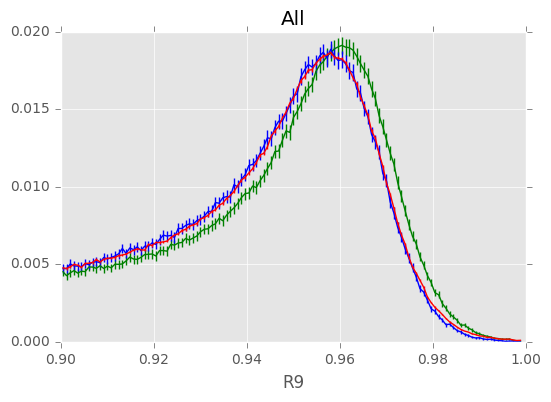

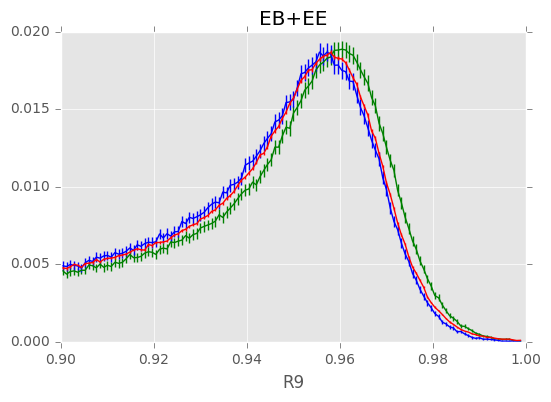

In [12]:
rv2 = np.arange(0.9,1.0,0.0008)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("R9")
    
plot.plotHistErr(dfmc_AllWeights["R9"], rv2,Weight=dfmc_AllWeights["weight"], Color="g")
plot.plotHistErr(dfmc_AllWeights["R9_corr"], rv2,Weight=dfmc_AllWeights["weight"], Color="b")
plot.plotHistErr(dfdata["R9"], rv2, Color="r")

ax.set_title('All')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("R9")
    
plot.plotHistErr(dfmc_ConWeights["R9"], rv2, Weight=dfmc_ConWeights["weight"], Color="g")
plot.plotHistErr(dfmc_ConWeights["R9_corr"], rv2,Weight=dfmc_ConWeights["weight"], Color="b")
plot.plotHistErr(dfdata["R9"], rv2, Color="r")

ax.set_title('EB+EE')

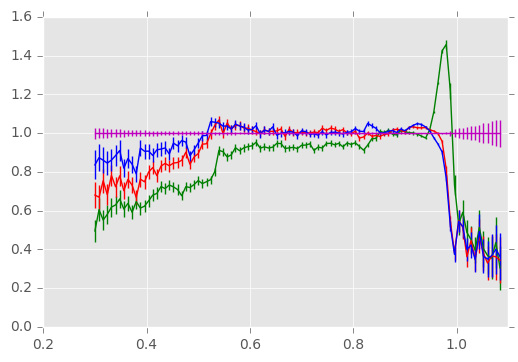

In [13]:
#ratio plots
rv3 = np.arange(0.3,1.1,0.008)
plot.plotHistRatio(dfmc_ConWeights["R9"],dfdata["R9"], rv3, Weight1=dfmc_ConWeights["weight"], Color="g")
plot.plotHistRatio(dfmc_AllWeights["R9_corr"],dfdata["R9"], rv3,Weight1=dfmc_AllWeights["weight"], Color="r")
plot.plotHistRatio(dfmc_ConWeights["R9_corr"],dfdata["R9"], rv3,Weight1=dfmc_ConWeights["weight"], Color="b")
plot.plotHistRatio(dfdata["R9"],dfdata["R9"], rv3, Color="m")

plotting  R9


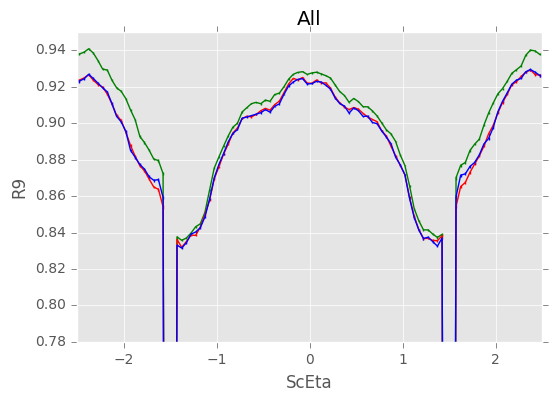

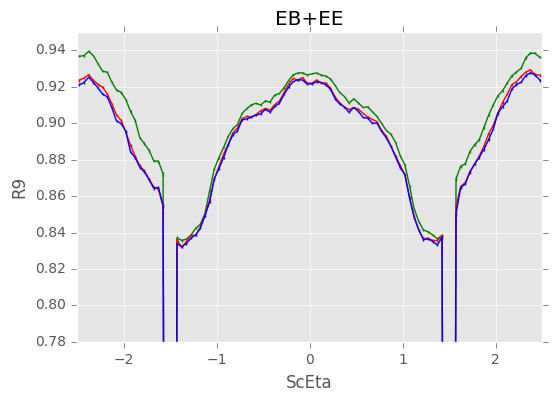

In [25]:
for yvar in ["R9"]:
    sec="EB"
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
        else: 
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
    if yvar == "S4":
        if sec=="EB":
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
        else: 
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
    if yvar == "SigmaIeIe":
        if sec=="EB":
            minY, maxY = 0.007, 0.01
            ymin,ymax=0.0083,0.0092
        else: 
            minY, maxY = 0.022, 0.028
            ymin,ymax=0.023,0.026
    if yvar == "EtaWidth":
        if sec=="EB":
            minY, maxY = 0.006, 0.012
            ymin,ymax=0.008,0.01
        else: 
            minY, maxY = 0.005, 0.030
            ymin,ymax=0.005,0.03
    if yvar == "PhiWidth":
        if sec=="EB": 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.01,0.05
        else: 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.025,0.05
    if yvar == "CovarianceIphiIphi":
        if sec=="EB":
            minY, maxY = 0.010, 0.016
            ymin,ymax=0.0115,0.0135
        else: 
            minY, maxY = 0.02, 0.040
            ymin,ymax=0.028,0.036
    if yvar == "CovarianceIetaIphi":
        if sec=="EB":
            minY, maxY = -0.00003, 0.00003
            ymin,ymax=-0.000003,0.000003
        else: 
            minY, maxY = -0.0002, 0.0002
            ymin,ymax=-0.00003,0.00003
    for xvar in ["ScEta"]:
        if xvar=="ScEta":
            xmin,xmax= -2.5,2.5
        if xvar=="Pt":
            xmin,xmax=20.0,80.0
        if xvar=='rho':
            xmin,xmax=0.,40.
        if xvar=="Phi":
            xmin,xmax=-3.14,3.14
            
        fig = plt.figure(dpi=400)
        ax = fig.add_subplot(111)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        ax.set_xlabel(xvar)
        ax.set_ylabel(yvar)
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(ymin,ymax)
        plot.Profile(dfmc_AllWeights[xvar]  , dfmc_AllWeights[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfmc_AllWeights["weight"])
        plot.Profile(dfdata[xvar]  , dfdata[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfdata["weight"])
        plot.Profile(dfmc_AllWeights[xvar]  , dfmc_AllWeights[yvar+'_corr']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfmc_AllWeights["weight"])
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        ax.set_title('All')
        #name= name0+yvar+"vs"+xvar
        #fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
        #plot.exportToPdf(name,section)
        fig = plt.figure(dpi=400)
        ax = fig.add_subplot(111)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        ax.set_xlabel(xvar)
        ax.set_ylabel(yvar)
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(ymin,ymax)
        plot.Profile(dfmc_ConWeights[xvar]  , dfmc_ConWeights[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfmc_ConWeights["weight"])
        plot.Profile(dfdata[xvar]  , dfdata[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfdata["weight"])
        plot.Profile(dfmc_ConWeights[xvar]  , dfmc_ConWeights[yvar+'_corr']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfmc_ConWeights["weight"])
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        #name= name0+yvar+"vs"+xvar
        #fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
        #plot.exportToPdf(name,section)
        ax.set_title('EB+EE')